In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
gold=pd.read_csv("gld_price_data.csv")

In [3]:
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold.shape

(2290, 6)

In [6]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#checking the number of missing values
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting the statistical measures of the data
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation = gold.drop(columns=['Date']).corr()

<Axes: >

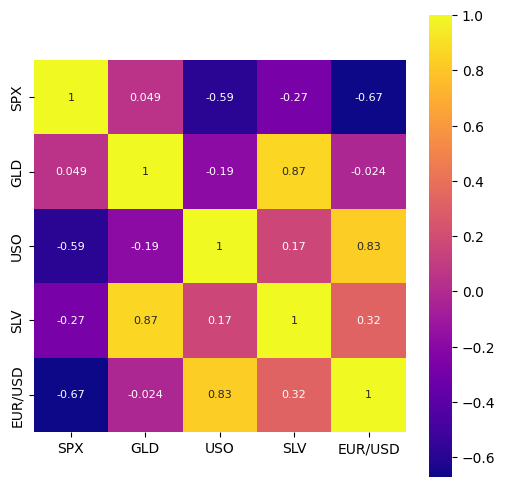

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={"size":8},cmap="plasma")

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


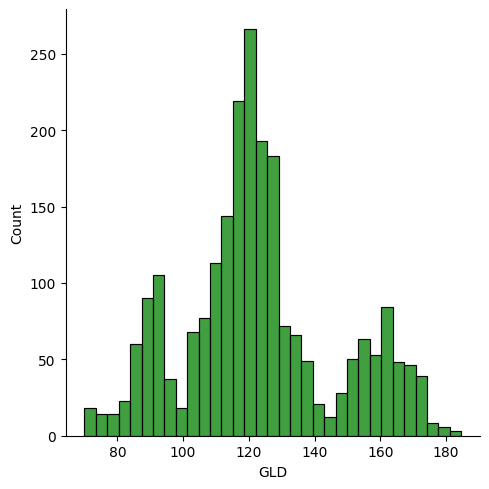

In [12]:
#checking the distribution of GLD price
sns.displot(gold['GLD'],color='green')

In [13]:
X=gold.drop(['Date','GLD'],axis=1)
Y=gold['GLD']

In [14]:
Y.shape

(2290,)

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
reg=RandomForestRegressor()
reg.fit(X_train,Y_train)
predictions=reg.predict(X_test)
r2_score(Y_test,predictions)

0.9912280071466462

In [17]:
print(predictions)

[122.6976     130.53870263 127.64649997  96.63099751 118.99080076
 114.2306991  124.80500143 117.69029913 107.95290132  98.11439977
  95.18499954 167.3755985  148.582301   116.01150037 170.76070168
  85.21639983 123.19959888 109.39419697 112.94680087 131.59590278
 124.19169899 113.67630137 115.74020053 108.81249937 108.42360139
 125.7737993  119.86639956 112.69209947 113.4624012  125.61519911
 145.87480196  89.66900002 167.74619967 113.6783995  108.37980087
 120.29630097 142.35149962 161.19640148 174.03769832 153.02960137
 119.39910119 113.56750029 121.39209914 113.61329912 121.96010037
 107.82050061  88.62349882 114.22889915 129.77410204 117.72390099
 104.24760014 129.84140221 107.12329877 160.72000462 131.63809986
 118.26719987 146.73450093 135.37470195  95.53830086 124.57100135
 115.6088985   85.97410091 104.42709917 113.89920088  84.13139919
 122.2704006  116.55359909 113.57810196 164.75600289  92.40500018
  80.28150089 161.04260047 159.04790248 106.82829999 148.07470154
 109.74329